In [0]:
dbutils.fs.ls('FileStore/tables')

Out[1]: [FileInfo(path='dbfs:/FileStore/tables/WEEK7ASS.ipynb', name='WEEK7ASS.ipynb', size=8974, modificationTime=1647880214000),
 FileInfo(path='dbfs:/FileStore/tables/WEEK_8_ASS___1_.ipynb', name='WEEK_8_ASS___1_.ipynb', size=1200916, modificationTime=1648561565000),
 FileInfo(path='dbfs:/FileStore/tables/accounts.zip', name='accounts.zip', size=5297592, modificationTime=1645025961000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltri/', name='clinicaltri/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial/', name='clinicaltrial/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2019.csv', name='clinicaltrial_2019.csv', size=42400056, modificationTime=1651832598000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2019_csv', name='clinicaltrial_2019_csv', size=42400056, modificationTime=1648053134000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2019_csv-1.gz', name='clinicaltrial_2019_csv-1.gz', size

CONVERTING MY FILE TO A RDD

In [0]:
Clinicalvar='FileStore/tables/clinicaltrial_2021.csv'
YEAR = '2021'
MYMESHFILE ='FileStore/tables/mesh.csv'
MYPHARMA =  '/FileStore/tables/pharma.csv'

In [0]:
myRDD = sc.textFile(Clinicalvar)
myRDD.take(6)

Out[3]: ['Id|Sponsor|Status|Start|Completion|Type|Submission|Conditions|Interventions',
 'NCT02758028|The University of Hong Kong|Recruiting|Aug 2005|Nov 2021|Interventional|Apr 2016||',
 'NCT02751957|Duke University|Completed|Jul 2016|Jul 2020|Interventional|Apr 2016|Autistic Disorder,Autism Spectrum Disorder|',
 'NCT02758483|Universidade Federal do Rio de Janeiro|Completed|Mar 2017|Jan 2018|Interventional|Apr 2016|Diabetes Mellitus|',
 'NCT02759848|Istanbul Medeniyet University|Completed|Jan 2012|Dec 2014|Observational|May 2016|Tuberculosis,Lung Diseases,Pulmonary Disease|',
 'NCT02758860|University of Roma La Sapienza|Active, not recruiting|Jun 2016|Sep 2020|Observational [Patient Registry]|Apr 2016|Diverticular Diseases,Diverticulum,Diverticulosis|']

REMOVING MY HEADER

In [0]:
myRDD.first()

Out[4]: 'Id|Sponsor|Status|Start|Completion|Type|Submission|Conditions|Interventions'

In [0]:
header=myRDD.first()

In [0]:
myrdd2=myRDD.filter(lambda t: t != header)

In [0]:
myRDD.take(5)

Out[7]: ['Id|Sponsor|Status|Start|Completion|Type|Submission|Conditions|Interventions',
 'NCT02758028|The University of Hong Kong|Recruiting|Aug 2005|Nov 2021|Interventional|Apr 2016||',
 'NCT02751957|Duke University|Completed|Jul 2016|Jul 2020|Interventional|Apr 2016|Autistic Disorder,Autism Spectrum Disorder|',
 'NCT02758483|Universidade Federal do Rio de Janeiro|Completed|Mar 2017|Jan 2018|Interventional|Apr 2016|Diabetes Mellitus|',
 'NCT02759848|Istanbul Medeniyet University|Completed|Jan 2012|Dec 2014|Observational|May 2016|Tuberculosis,Lung Diseases,Pulmonary Disease|']

In [0]:
myrdd2.take(10)

Out[8]: ['NCT02758028|The University of Hong Kong|Recruiting|Aug 2005|Nov 2021|Interventional|Apr 2016||',
 'NCT02751957|Duke University|Completed|Jul 2016|Jul 2020|Interventional|Apr 2016|Autistic Disorder,Autism Spectrum Disorder|',
 'NCT02758483|Universidade Federal do Rio de Janeiro|Completed|Mar 2017|Jan 2018|Interventional|Apr 2016|Diabetes Mellitus|',
 'NCT02759848|Istanbul Medeniyet University|Completed|Jan 2012|Dec 2014|Observational|May 2016|Tuberculosis,Lung Diseases,Pulmonary Disease|',
 'NCT02758860|University of Roma La Sapienza|Active, not recruiting|Jun 2016|Sep 2020|Observational [Patient Registry]|Apr 2016|Diverticular Diseases,Diverticulum,Diverticulosis|',
 'NCT02757209|Consorzio Futuro in Ricerca|Completed|Apr 2016|Jan 2018|Interventional|Apr 2016|Asthma|Fluticasone,Xhance,Budesonide,Formoterol Fumarate,Salmeterol Xinafoate',
 'NCT02752438|Ankara University|Unknown status|May 2016|Jul 2017|Observational [Patient Registry]|Apr 2016|Hypoventilation|',
 'NCT02753543|R

In [0]:
MYRDD2 =myrdd2.map(lambda t: (t.split("|")))
MYRDD2.take(5)

Out[9]: [['NCT02758028',
  'The University of Hong Kong',
  'Recruiting',
  'Aug 2005',
  'Nov 2021',
  'Interventional',
  'Apr 2016',
  '',
  ''],
 ['NCT02751957',
  'Duke University',
  'Completed',
  'Jul 2016',
  'Jul 2020',
  'Interventional',
  'Apr 2016',
  'Autistic Disorder,Autism Spectrum Disorder',
  ''],
 ['NCT02758483',
  'Universidade Federal do Rio de Janeiro',
  'Completed',
  'Mar 2017',
  'Jan 2018',
  'Interventional',
  'Apr 2016',
  'Diabetes Mellitus',
  ''],
 ['NCT02759848',
  'Istanbul Medeniyet University',
  'Completed',
  'Jan 2012',
  'Dec 2014',
  'Observational',
  'May 2016',
  'Tuberculosis,Lung Diseases,Pulmonary Disease',
  ''],
 ['NCT02758860',
  'University of Roma La Sapienza',
  'Active, not recruiting',
  'Jun 2016',
  'Sep 2020',
  'Observational [Patient Registry]',
  'Apr 2016',
  'Diverticular Diseases,Diverticulum,Diverticulosis',
  '']]

In [0]:
myrdd2.count()

Out[10]: 387261

SECOUND QUESTION, LISTING THE TYPE OF STUDIES AND ITS FREQUENCIES

In [0]:
MY3RDD = MYRDD2.map(lambda t: (t[5]))
MY3RDD.take(40)

Out[11]: ['Interventional',
 'Interventional',
 'Interventional',
 'Observational',
 'Observational [Patient Registry]',
 'Interventional',
 'Observational [Patient Registry]',
 'Interventional',
 'Interventional',
 'Interventional',
 'Observational',
 'Observational',
 'Observational',
 'Interventional',
 'Interventional',
 'Observational',
 'Interventional',
 'Interventional',
 'Interventional',
 'Observational',
 'Interventional',
 'Interventional',
 'Interventional',
 'Interventional',
 'Interventional',
 'Interventional',
 'Interventional',
 'Interventional',
 'Interventional',
 'Interventional',
 'Observational',
 'Interventional',
 'Interventional',
 'Interventional',
 'Interventional',
 'Interventional',
 'Interventional',
 'Interventional',
 'Interventional',
 'Interventional']

In [0]:
MY4RDD =MYRDD2.map(lambda t:(t[5],1))
MY4RDD.take(50)

Out[12]: [('Interventional', 1),
 ('Interventional', 1),
 ('Interventional', 1),
 ('Observational', 1),
 ('Observational [Patient Registry]', 1),
 ('Interventional', 1),
 ('Observational [Patient Registry]', 1),
 ('Interventional', 1),
 ('Interventional', 1),
 ('Interventional', 1),
 ('Observational', 1),
 ('Observational', 1),
 ('Observational', 1),
 ('Interventional', 1),
 ('Interventional', 1),
 ('Observational', 1),
 ('Interventional', 1),
 ('Interventional', 1),
 ('Interventional', 1),
 ('Observational', 1),
 ('Interventional', 1),
 ('Interventional', 1),
 ('Interventional', 1),
 ('Interventional', 1),
 ('Interventional', 1),
 ('Interventional', 1),
 ('Interventional', 1),
 ('Interventional', 1),
 ('Interventional', 1),
 ('Interventional', 1),
 ('Observational', 1),
 ('Interventional', 1),
 ('Interventional', 1),
 ('Interventional', 1),
 ('Interventional', 1),
 ('Interventional', 1),
 ('Interventional', 1),
 ('Interventional', 1),
 ('Interventional', 1),
 ('Interventional', 1),
 (

In [0]:
MY5RDD = MY4RDD.reduceByKey(lambda t1,t2:t1+t2)
MY5RDD.take(5)

Out[13]: [('Observational', 77540),
 ('Observational [Patient Registry]', 8180),
 ('Interventional', 301472),
 ('Expanded Access', 69)]

In [0]:
MY6RDD = MY5RDD.sortBy(lambda t:(t[1]), ascending = False)

In [0]:
MY6RDD.take(4)

Out[15]: [('Interventional', 301472),
 ('Observational', 77540),
 ('Observational [Patient Registry]', 8180),
 ('Expanded Access', 69)]

FINDING THE  FIVE HIGHEST CONDITION

In [0]:
MY7RDD =MYRDD2.map(lambda t: (t[7]))

In [0]:
MY7RDD.take(20)

Out[17]: ['',
 'Autistic Disorder,Autism Spectrum Disorder',
 'Diabetes Mellitus',
 'Tuberculosis,Lung Diseases,Pulmonary Disease',
 'Diverticular Diseases,Diverticulum,Diverticulosis',
 'Asthma',
 'Hypoventilation',
 'Lymphoma',
 '',
 'Myositis',
 'Diabetes Mellitus',
 'Hypertension',
 'Periodontal Diseases',
 'Diabetes Mellitus',
 'Appendicitis,Stomach Ulcer,Cholecystolithiasis,Cholelithiasis,Gallstones',
 '',
 '',
 'Hookworm Infections,Celiac Disease',
 'Ascites',
 'Chronic Pain,Substance-Related Disorders,Opioid-Related Disorders,Narcotic-Related Disorders,Behavior']

REMOVING EMPTY CONDITION

In [0]:
emptyRDD =['']


In [0]:
filteredrdd =MY7RDD.filter(lambda t: t not in emptyRDD)

In [0]:
filteredrdd.take(10)

Out[20]: ['Autistic Disorder,Autism Spectrum Disorder',
 'Diabetes Mellitus',
 'Tuberculosis,Lung Diseases,Pulmonary Disease',
 'Diverticular Diseases,Diverticulum,Diverticulosis',
 'Asthma',
 'Hypoventilation',
 'Lymphoma',
 'Myositis',
 'Diabetes Mellitus',
 'Hypertension']

SPILTTING THE CONDITIONS

In [0]:
uniqueConRDD = filteredrdd.flatMap(lambda t: (t.split(",")))

In [0]:
uniqueConRDD.take(14)

Out[22]: ['Autistic Disorder',
 'Autism Spectrum Disorder',
 'Diabetes Mellitus',
 'Tuberculosis',
 'Lung Diseases',
 'Pulmonary Disease',
 'Diverticular Diseases',
 'Diverticulum',
 'Diverticulosis',
 'Asthma',
 'Hypoventilation',
 'Lymphoma',
 'Myositis',
 'Diabetes Mellitus']

COUNTING MOST FREQUENT UNIQUE CONDITION

In [0]:
CountRDD= uniqueConRDD.map (lambda t:(t,1))

In [0]:
CountRDD.take(5)

Out[24]: [('Autistic Disorder', 1),
 ('Autism Spectrum Disorder', 1),
 ('Diabetes Mellitus', 1),
 ('Tuberculosis', 1),
 ('Lung Diseases', 1)]

In [0]:
CountRDD2=CountRDD.reduceByKey(lambda t1,t2:t1+t2)

In [0]:
CountRDD2.take(5)

Out[26]: [('Autistic Disorder', 867),
 ('Autism Spectrum Disorder', 880),
 ('Tuberculosis', 1118),
 ('Diverticular Diseases', 65),
 ('Diverticulosis', 18)]

In [0]:
CountRDD3 = CountRDD2.sortBy(lambda t:(t[1]),ascending=False)

RESULT OF FIVE HIGHEST CONDITION

In [0]:
CountRDD3.take(5)

Out[28]: [('Carcinoma', 13389),
 ('Diabetes Mellitus', 11080),
 ('Neoplasms', 9371),
 ('Breast Neoplasms', 8640),
 ('Syndrome', 8032)]

CREATING RDD FOR MESH FILE

In [0]:
MESHRDD = sc.textFile(MYMESHFILE)

In [0]:
MESHRDD.take(5)

Out[30]: ['term,tree',
 'Calcimycin,D03.633.100.221.173',
 'A-23187,D03.633.100.221.173',
 'Temefos,D02.705.400.625.800',
 'Temefos,D02.705.539.345.800']

In [0]:
MESHRDD = MESHRDD.map(lambda m : m.split(','))


In [0]:
MESHRDD.take(25)

Out[32]: [['term', 'tree'],
 ['Calcimycin', 'D03.633.100.221.173'],
 ['A-23187', 'D03.633.100.221.173'],
 ['Temefos', 'D02.705.400.625.800'],
 ['Temefos', 'D02.705.539.345.800'],
 ['Temefos', 'D02.886.300.692.800'],
 ['Abate', 'D02.705.400.625.800'],
 ['Abate', 'D02.705.539.345.800'],
 ['Abate', 'D02.886.300.692.800'],
 ['Difos', 'D02.705.400.625.800'],
 ['Difos', 'D02.705.539.345.800'],
 ['Difos', 'D02.886.300.692.800'],
 ['Abattoirs', 'J01.576.423.200.700.100'],
 ['Abattoirs', 'J03.540.020'],
 ['Abbreviations as Topic', 'L01.559.598.400.556.131'],
 ['Acronyms as Topic', 'L01.559.598.400.556.131'],
 ['Abdomen', 'A01.923.047'],
 ['"Abdomen', ' Acute"', 'C23.888.592.612.054.200'],
 ['"Abdomen', ' Acute"', 'C23.888.821.030.249'],
 ['Abdominal Injuries', 'C26.017'],
 ['Abdominal Neoplasms', 'C04.588.033'],
 ['Abdominal Muscles', 'A02.633.567.050'],
 ['Cremaster Muscle', 'A02.633.567.050'],
 ['Pyramidalis Muscle', 'A02.633.567.050'],
 ['Quadratus Abdominis', 'A02.633.567.050']]

In [0]:
MESHRDD = MESHRDD.map(lambda m: (m[0],m[1].split('.')))

In [0]:
MESHRDD.take(5)

Out[34]: [('term', ['tree']),
 ('Calcimycin', ['D03', '633', '100', '221', '173']),
 ('A-23187', ['D03', '633', '100', '221', '173']),
 ('Temefos', ['D02', '705', '400', '625', '800']),
 ('Temefos', ['D02', '705', '539', '345', '800'])]

In [0]:
MESHRDD = MESHRDD.map(lambda m: (m[0],m[1][0]))

In [0]:
MESHRDD.take(15)

Out[36]: [('term', 'tree'),
 ('Calcimycin', 'D03'),
 ('A-23187', 'D03'),
 ('Temefos', 'D02'),
 ('Temefos', 'D02'),
 ('Temefos', 'D02'),
 ('Abate', 'D02'),
 ('Abate', 'D02'),
 ('Abate', 'D02'),
 ('Difos', 'D02'),
 ('Difos', 'D02'),
 ('Difos', 'D02'),
 ('Abattoirs', 'J01'),
 ('Abattoirs', 'J03'),
 ('Abbreviations as Topic', 'L01')]

In [0]:
meshheader=MESHRDD.first()

In [0]:
NEWMESHRDD = MESHRDD.filter(lambda m: m != meshheader)

In [0]:
NEWMESHRDD.take(5)

Out[39]: [('Calcimycin', 'D03'),
 ('A-23187', 'D03'),
 ('Temefos', 'D02'),
 ('Temefos', 'D02'),
 ('Temefos', 'D02')]

joining the results of QUESTION 3 TO THE MESH.CSV

In [0]:
RESULTSRDD = CountRDD3.join(NEWMESHRDD)

In [0]:
RESULTSRDD.take(10)

Out[41]: [('Syndrome', (8032, 'C23')),
 ('Lymphoma', (5395, 'C04')),
 ('Lymphoma', (5395, 'C15')),
 ('Lymphoma', (5395, 'C20')),
 ('Infections', (5323, 'C01')),
 ('Depression', (5199, 'F01')),
 ('Obesity', (3447, 'C18')),
 ('Obesity', (3447, 'C23')),
 ('Obesity', (3447, 'E01')),
 ('Obesity', (3447, 'G07'))]

In [0]:
RESULTSRDD=RESULTSRDD.map(lambda m: m[1])

In [0]:
RESULTSRDD.take(20)

Out[43]: [(8032, 'C23'),
 (5395, 'C04'),
 (5395, 'C15'),
 (5395, 'C20'),
 (5323, 'C01'),
 (5199, 'F01'),
 (3447, 'C18'),
 (3447, 'C23'),
 (3447, 'E01'),
 (3447, 'G07'),
 (3442, 'C14'),
 (3123, 'C14'),
 (2900, 'C10'),
 (2900, 'C10'),
 (2900, 'C10'),
 (2866, 'C23'),
 (2716, 'C23'),
 (2501, 'C15'),
 (2405, 'C10'),
 (2405, 'C10')]

In [0]:
RESULTSRDD= RESULTSRDD.map(lambda m : (m[1],m[0]))

In [0]:
RESULTSRDD.take(15)

Out[45]: [('C23', 8032),
 ('C04', 5395),
 ('C15', 5395),
 ('C20', 5395),
 ('C01', 5323),
 ('F01', 5199),
 ('C18', 3447),
 ('C23', 3447),
 ('E01', 3447),
 ('G07', 3447),
 ('C14', 3442),
 ('C14', 3123),
 ('C10', 2900),
 ('C10', 2900),
 ('C10', 2900)]

In [0]:
RESULTSRDD =RESULTSRDD.reduceByKey(lambda m,n: m+n)

In [0]:
RESULTSRDD.take(15)

Out[47]: [('C15', 34571),
 ('C26', 20476),
 ('C09', 8842),
 ('C07', 11980),
 ('G11', 4396),
 ('A11', 267),
 ('C17', 28184),
 ('A07', 204),
 ('G08', 660),
 ('C22', 205),
 ('N06', 3298),
 ('C21', 13),
 ('A04', 1),
 ('E02', 137),
 ('G09', 295)]

In [0]:
RESULTSRDD = RESULTSRDD.map(lambda m:(m[1],m[0]))

In [0]:
RESULTSRDD.take(10)

Out[49]: [(34571, 'C15'),
 (20476, 'C26'),
 (8842, 'C09'),
 (11980, 'C07'),
 (4396, 'G11'),
 (267, 'A11'),
 (28184, 'C17'),
 (204, 'A07'),
 (660, 'G08'),
 (205, 'C22')]

In [0]:
RESULTSRDD = RESULTSRDD.sortByKey(False)

In [0]:
RESULTSRDD = RESULTSRDD.map(lambda m:(m[1], m[0]))

In [0]:
RESULTSRDD.take(5)

Out[52]: [('C04', 143994),
 ('C23', 136079),
 ('C01', 106674),
 ('C14', 94523),
 ('C10', 92310)]

LOADING CSV FILE WHICH CONTAINS THE PHARMACEUTICALS COMPANY AND CONVERTING IT TO A RDD

In [0]:
RDDPHARMA=sc.textFile(MYPHARMA)

In [0]:
RDDPHARMA.take(1)

Out[54]: ['"Company","Parent_Company","Penalty_Amount","Subtraction_From_Penalty","Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting","Penalty_Year","Penalty_Date","Offense_Group","Primary_Offense","Secondary_Offense","Description","Level_of_Government","Action_Type","Agency","Civil/Criminal","Prosecution_Agreement","Court","Case_ID","Private_Litigation_Case_Title","Lawsuit_Resolution","Facility_State","City","Address","Zip","NAICS_Code","NAICS_Translation","HQ_Country_of_Parent","HQ_State_of_Parent","Ownership_Structure","Parent_Company_Stock_Ticker","Major_Industry_of_Parent","Specific_Industry_of_Parent","Info_Source","Notes"']

In [0]:
ListRDDPHARMA = RDDPHARMA.map(lambda p: (p.split(",")))

In [0]:
ListRDDPHARMA.take(15)

Out[56]: [['"Company"',
  '"Parent_Company"',
  '"Penalty_Amount"',
  '"Subtraction_From_Penalty"',
  '"Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting"',
  '"Penalty_Year"',
  '"Penalty_Date"',
  '"Offense_Group"',
  '"Primary_Offense"',
  '"Secondary_Offense"',
  '"Description"',
  '"Level_of_Government"',
  '"Action_Type"',
  '"Agency"',
  '"Civil/Criminal"',
  '"Prosecution_Agreement"',
  '"Court"',
  '"Case_ID"',
  '"Private_Litigation_Case_Title"',
  '"Lawsuit_Resolution"',
  '"Facility_State"',
  '"City"',
  '"Address"',
  '"Zip"',
  '"NAICS_Code"',
  '"NAICS_Translation"',
  '"HQ_Country_of_Parent"',
  '"HQ_State_of_Parent"',
  '"Ownership_Structure"',
  '"Parent_Company_Stock_Ticker"',
  '"Major_Industry_of_Parent"',
  '"Specific_Industry_of_Parent"',
  '"Info_Source"',
  '"Notes"'],
 ['"Abbott Laboratories"',
  '"Abbott Laboratories"',
  '"$5',
  '475',
  '000"',
  '"$0"',
  '"$5',
  '475',
  '000"',
  '"2013"',
  '"20131227"',
  '"government-contracting-related off

In [0]:
ParentCo = ListRDDPHARMA.map(lambda p:(p[1]))

In [0]:
ParentCo.take(15)

Out[58]: ['"Parent_Company"',
 '"Abbott Laboratories"',
 '"AbbVie"',
 '"AbbVie"',
 ' Inc."',
 '"Johnson & Johnson"',
 '"Abbott Laboratories"',
 ' Inc."',
 '"Johnson & Johnson"',
 ' a division of Ethicon Inc."',
 '"Abbott Laboratories"',
 '"AbbVie"',
 '"AbbVie"',
 '"Pfizer"',
 ' Inc."']

In [0]:
ListParentCo=ParentCo.map(lambda p:(p.replace('"',"")))

In [0]:
ListParentCo.take(15)

Out[60]: ['Parent_Company',
 'Abbott Laboratories',
 'AbbVie',
 'AbbVie',
 ' Inc.',
 'Johnson & Johnson',
 'Abbott Laboratories',
 ' Inc.',
 'Johnson & Johnson',
 ' a division of Ethicon Inc.',
 'Abbott Laboratories',
 'AbbVie',
 'AbbVie',
 'Pfizer',
 ' Inc.']

In [0]:
RmheaderP=ListParentCo.first()
ListParentCo1=ListParentCo.filter(lambda p: p !=RmheaderP)

In [0]:
ListParentCo1.take(15)

Out[62]: ['Abbott Laboratories',
 'AbbVie',
 'AbbVie',
 ' Inc.',
 'Johnson & Johnson',
 'Abbott Laboratories',
 ' Inc.',
 'Johnson & Johnson',
 ' a division of Ethicon Inc.',
 'Abbott Laboratories',
 'AbbVie',
 'AbbVie',
 'Pfizer',
 ' Inc.',
 ' Inc.']

In [0]:
DistcParentCo=ListParentCo.distinct()

In [0]:
DistcParentCo.take(15)

Out[64]: ['Abbott Laboratories',
 'AbbVie',
 ' LLC',
 'AstraZeneca',
 'Sanofi',
 'AVEO Pharmaceuticals',
 'Bausch Health',
 'GlaxoSmithKline',
 'Teva Pharmaceutical Industries',
 'Merck',
 'Novartis',
 'Daiichi Sankyo',
 'Eisai',
 'KV Pharmaceutical',
 " INC. EMPLOYEES' 401(K) SAVINGS PLAN"]

In [0]:
countParentCo =DistcParentCo.map(lambda count:(count,1))

In [0]:
countParentCo.take(15)

Out[66]: [('Abbott Laboratories', 1),
 ('AbbVie', 1),
 (' LLC', 1),
 ('AstraZeneca', 1),
 ('Sanofi', 1),
 ('AVEO Pharmaceuticals', 1),
 ('Bausch Health', 1),
 ('GlaxoSmithKline', 1),
 ('Teva Pharmaceutical Industries', 1),
 ('Merck', 1),
 ('Novartis', 1),
 ('Daiichi Sankyo', 1),
 ('Eisai', 1),
 ('KV Pharmaceutical', 1),
 (" INC. EMPLOYEES' 401(K) SAVINGS PLAN", 1)]

EXTRACTING SPONSOR FROM MY CLINICAL TRIAL FILE

In [0]:
ClinSpon = myRDD.map(lambda s: s.split("|"))

In [0]:
ClinSpon.take(3)

Out[68]: [['Id',
  'Sponsor',
  'Status',
  'Start',
  'Completion',
  'Type',
  'Submission',
  'Conditions',
  'Interventions'],
 ['NCT02758028',
  'The University of Hong Kong',
  'Recruiting',
  'Aug 2005',
  'Nov 2021',
  'Interventional',
  'Apr 2016',
  '',
  ''],
 ['NCT02751957',
  'Duke University',
  'Completed',
  'Jul 2016',
  'Jul 2020',
  'Interventional',
  'Apr 2016',
  'Autistic Disorder,Autism Spectrum Disorder',
  '']]

In [0]:
ClinSponCol =ClinSpon.map(lambda s :s[1])

In [0]:
ClinSponCol.take(15)

Out[70]: ['Sponsor',
 'The University of Hong Kong',
 'Duke University',
 'Universidade Federal do Rio de Janeiro',
 'Istanbul Medeniyet University',
 'University of Roma La Sapienza',
 'Consorzio Futuro in Ricerca',
 'Ankara University',
 'Ruijin Hospital',
 'Washington University School of Medicine',
 'Orphazyme',
 'Novo Nordisk A/S',
 'Daniel Alexandre Bottino',
 'Bulent Ecevit University',
 'Institut für Pharmakologie und Präventive Medizin']

In [0]:
RmSponHeader =ClinSponCol.first()

In [0]:
ClinSponColm = ClinSponCol.filter(lambda r: r !=RmSponHeader)

In [0]:
ClinSponColm.take (6)

Out[73]: ['The University of Hong Kong',
 'Duke University',
 'Universidade Federal do Rio de Janeiro',
 'Istanbul Medeniyet University',
 'University of Roma La Sapienza',
 'Consorzio Futuro in Ricerca']

In [0]:
CountClinSponColm=ClinSponColm.map(lambda c:(c,1))

In [0]:
CountClinSponColm.take(15)

Out[75]: [('The University of Hong Kong', 1),
 ('Duke University', 1),
 ('Universidade Federal do Rio de Janeiro', 1),
 ('Istanbul Medeniyet University', 1),
 ('University of Roma La Sapienza', 1),
 ('Consorzio Futuro in Ricerca', 1),
 ('Ankara University', 1),
 ('Ruijin Hospital', 1),
 ('Washington University School of Medicine', 1),
 ('Orphazyme', 1),
 ('Novo Nordisk A/S', 1),
 ('Daniel Alexandre Bottino', 1),
 ('Bulent Ecevit University', 1),
 ('Institut für Pharmakologie und Präventive Medizin', 1),
 ('The Third Xiangya Hospital of Central South University', 1)]

In [0]:
CountClinSponColm1=CountClinSponColm.reduceByKey(lambda c,d:c+d)

In [0]:
CountClinSponColm1.take(5)

Out[77]: [('The University of Hong Kong', 757),
 ('Universidade Federal do Rio de Janeiro', 103),
 ('University of Roma La Sapienza', 289),
 ('Ankara University', 107),
 ('Ruijin Hospital', 200)]

In [0]:
CountClinSponColm2= CountClinSponColm1.subtractByKey(countParentCo)

In [0]:
CountClinSponColm2.take(5)

Out[79]: [('University of Roma La Sapienza', 289),
 ('Ruijin Hospital', 200),
 ('Washington University School of Medicine', 1374),
 ('Novo Nordisk A/S', 1081),
 ('Medicines for Malaria Venture', 55)]

In [0]:
CountClinSponColm3 = CountClinSponColm2.map(lambda c: (c[1],c[0]))

In [0]:
CountClinSponColm3.take(10)

Out[81]: [(289, 'University of Roma La Sapienza'),
 (200, 'Ruijin Hospital'),
 (1374, 'Washington University School of Medicine'),
 (1081, 'Novo Nordisk A/S'),
 (55, 'Medicines for Malaria Venture'),
 (190, 'Marmara University'),
 (861, 'University of Zurich'),
 (190, 'H. Lundbeck A/S'),
 (3, 'Ospedale San Giovanni Bellinzona'),
 (602, 'The University of Texas Health Science Center, Houston')]

In [0]:
CountClinSponColm4 = CountClinSponColm3.sortByKey(False)

In [0]:
CountClinSponColm4.take(5)

Out[83]: [(3218, 'National Cancer Institute (NCI)'),
 (2414, 'M.D. Anderson Cancer Center'),
 (2369, 'Assistance Publique - Hôpitaux de Paris'),
 (2300, 'Mayo Clinic'),
 (2243, 'Merck Sharp & Dohme Corp.')]

In [0]:
CountClinSponColm5 =CountClinSponColm4.map(lambda x:(x[1],x[0]))

In [0]:
CountClinSponColm5.take(10)

Out[85]: [('National Cancer Institute (NCI)', 3218),
 ('M.D. Anderson Cancer Center', 2414),
 ('Assistance Publique - Hôpitaux de Paris', 2369),
 ('Mayo Clinic', 2300),
 ('Merck Sharp & Dohme Corp.', 2243),
 ('Assiut University', 2154),
 ('Novartis Pharmaceuticals', 2088),
 ('Massachusetts General Hospital', 1971),
 ('Cairo University', 1928),
 ('Hoffmann-La Roche', 1828)]

VISUALIZATION


PLOTTING NO OF STUDIES COMPLETED IN MONTH IN CLIICALTRIAL 2021 FILE

In [0]:
Visualization= MYRDD2.filter(lambda f:f[2]=='Completed').map(lambda g:g[4])

In [0]:
Visualization.take(15)

Out[87]: ['Jul 2020',
 'Jan 2018',
 'Dec 2014',
 'Jan 2018',
 'Jul 2017',
 'Jan 2021',
 'Oct 2016',
 'Dec 2015',
 'Mar 2016',
 'May 2019',
 'Oct 2019',
 'Apr 2015',
 'Jan 2016',
 '',
 'Apr 2017']

In [0]:
Visualization1=Visualization.map(lambda s:s.split(" "))

In [0]:
Visualization2=Visualization1.filter(lambda v: v[-1] == YEAR).map(lambda w: (w[0],1))

In [0]:
Visualization2.take(15)

Out[90]: [('Jan', 1),
 ('Jun', 1),
 ('Mar', 1),
 ('Jan', 1),
 ('May', 1),
 ('Feb', 1),
 ('Feb', 1),
 ('May', 1),
 ('Aug', 1),
 ('May', 1),
 ('Mar', 1),
 ('Feb', 1),
 ('May', 1),
 ('May', 1),
 ('May', 1)]

In [0]:
Visualization3 = Visualization2.reduceByKey(lambda V,W:V+W)

In [0]:
Visualization3.take(50)

Out[92]: [('May', 984),
 ('Jan', 1131),
 ('Jun', 1094),
 ('Mar', 1227),
 ('Feb', 934),
 ('Aug', 700),
 ('Apr', 967),
 ('Jul', 819),
 ('Oct', 187),
 ('Sep', 528)]

In [0]:
import calendar 
ArrStudies = { j:k  for k ,j in enumerate(calendar.month_abbr[1:],1)}
ArrStudiesMonth = Visualization3.sortBy(lambda v :ArrStudies.get(v[0]))


In [0]:
ArrStudiesMonth.take(12)

Out[94]: [('Jan', 1131),
 ('Feb', 934),
 ('Mar', 1227),
 ('Apr', 967),
 ('May', 984),
 ('Jun', 1094),
 ('Jul', 819),
 ('Aug', 700),
 ('Sep', 528),
 ('Oct', 187)]

Out[95]: <function matplotlib.pyplot.show(close=None, block=None)>

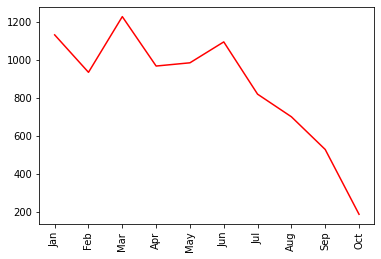

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

y = ArrStudiesMonth.map(lambda myrow: myrow[1]).collect()
x = ArrStudiesMonth.map(lambda myrow: myrow[0]).collect()

plt.plot(x, y , color= 'red')
plt.xticks(rotation=90)
plt.show

Out[96]: <function matplotlib.pyplot.show(close=None, block=None)>

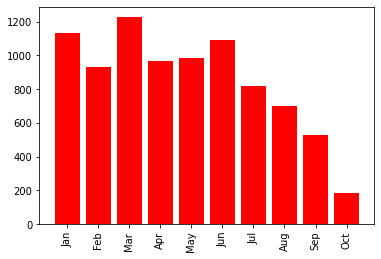

In [0]:
y = ArrStudiesMonth.map(lambda row: row[1]).collect()
x = ArrStudiesMonth.map(lambda row: row[0]).collect()

plt.bar(x, y , color= 'red')
plt.xticks(rotation=90)
plt.show

Out[97]: <function matplotlib.pyplot.show(close=None, block=None)>

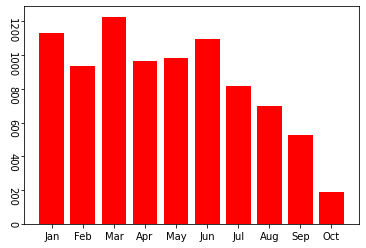

In [0]:
y = ArrStudiesMonth.map(lambda row: row[1]).collect()
x = ArrStudiesMonth.map(lambda row: row[0]).collect()
plt.bar(x, y , color= 'red')
plt.xticks(rotation=0)
plt.yticks(rotation=270)

plt.show

Out[98]: <function matplotlib.pyplot.show(close=None, block=None)>

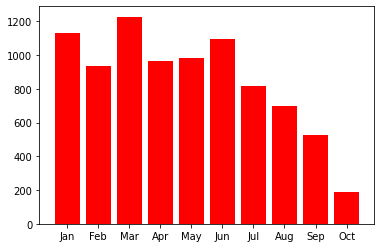

In [0]:
y = ArrStudiesMonth.map(lambda row: row[1]).collect()
x = ArrStudiesMonth.map(lambda row: row[0]).collect()
plt.bar(x, y , color= 'red')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show